<a href="https://colab.research.google.com/github/melisacaputo/RuralDigital/blob/main/Analisis-inicial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Abstract

**Análisis de características musicales y su relación con la cantidad de reproducciones**

Este proyecto se enfoca en el análisis de un conjunto de datos que contiene información detallada sobre canciones populares en Spotify. El objetivo principal es identificar patrones y relaciones significativas entre las características musicales y el éxito en streaming de las canciones.

El dataset cuenta con una cantidad muy numerosa de registros ya que contiene el ranking diario de los años 2017 y 2018 para cada cada región. Para simplificar el análisis y optimizar el rendimiento de memoria, se trabajará con un nuevo dataset filtrado por la región estadounidense como muestra de la población total.

Por otra parte, se cuenta con 22 columnas, que incluyen variables como la posición en las listas, el nombre de la canción, el artista, la cantidad de streams, el día del ranking, entre otras. Además, se dispone de datos sobre características musicales como danzabilidad, energía, tonalidad y más.

Se plantea la hipótesis de que existen características musicales específicas que tienen una influencia significativa en el éxito en streaming de las canciones. Se espera que variables como la danzabilidad, energía y valencia tengan una correlación positiva con la cantidad de streams. Tambien se busca entender si existen patrones temporales relacionados con la cantidad de streams de una canción.

Mediante técnicas de Data Science, se emplearán herramientas y algoritmos de aprendizaje automático para desarrollar modelos predictivos. Estos modelos buscarán predecir el éxito de una canción en términos de streams, en función de sus características musicales y su día de lanzamiento.

Además del análisis cuantitativo, se explorarán visualizaciones interactivas y técnicas de análisis exploratorio de datos que permitirán comprender mejor la relación entre las variables y su influencia en la popularidad de las canciones.

Los resultados y conclusiones obtenidos a partir de este proyecto podrían ser de gran utilidad para profesionales de la industria musical. Artistas, productores y discográficas podrán beneficiarse al obtener información valiosa sobre las características que pueden influir en el éxito de una canción en plataformas de streaming.


### Configuración y primer análisis del dataset

In [ ]:
# Librerías
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [ ]:
# Estilos
mpl.style.use('seaborn')
mpl.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#00bb2d'])

<ipython-input-2-ad3cbf14aec6>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


In [ ]:
# Importación del dataset
df_spotify = pd.read_csv('/content/spotify.csv')
df_spotify.shape

(3111889, 22)

In [ ]:
df_spotify['region'].unique()

array(['ee', 'cr', 'pt', 'gr', 'br', 'es', 'lu', 'ca', 'id', 'lt', 'fr',
       'my', 'ie', 'ar', 'gb', 'nz', 'dk', 'jp', 'nl', 'de', 'cz', 'is',
       'hn', 'gt', 'at', 'hu', 'hk', 'bg', 'bo', 'us', 'au', 'lv', 'ec',
       'do', 'no', 'py', 'pe', 'ch', 'cl', 'pl', 'pa', 'be', 'fi', 'it',
       'mt', 'ni', 'co', 'mx', 'ph'], dtype=object)

In [ ]:
# Nuevo dataset, filtrado por la región us (Estados Unidos)
df = df_spotify[df_spotify['region'] == 'us']
df.to_csv('spotify_us.csv', index=False)

In [ ]:
df = pd.read_csv('/content/spotify_us.csv')
df.shape

(72700, 22)

In [ ]:
df.head()

,position,track_name,artist,streams,url,year,month,day,region,danceability,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1,Bad and Boujee (feat. Lil Uzi Vert),Migos,1371493,https://open.spotify.com/track/4Km5HrUvYTaSUfi...,2017,1,1,us,927.0,...,-5.313,1,244.00,61.0,0.0,123.0,175.0,127.076,343150,4
1,2,Fake Love,Drake,1180074,https://open.spotify.com/track/343YBumqHu19cGo...,2017,1,1,us,927.0,...,-9.433,0,0.42,108.0,0.0,196.0,605.0,133.987,210937,4
2,3,Starboy,The Weeknd,1064351,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017,1,1,us,681.0,...,-7.028,1,282.00,165.0,3.49e-06,134.0,535.0,186.054,230453,4
3,4,Closer,The Chainsmokers,1010492,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017,1,1,us,748.0,...,-5.599,1,338.00,414.0,0.0,111.0,661.0,95.010,244960,4
4,5,Black Beatles,Rae Sremmurd,874289,https://open.spotify.com/track/6fujklziTHa8uoM...,2017,1,1,us,794.0,...,-6.163,1,649.00,142.0,0.0,128.0,355.0,145.926,291893,4


**Descripción de las variables**

* position: posición en el ranking en ese día.
* streams: número de reproducciones en ese día.
* year: año del ranking.
* month: mes del ranking.
* day: día del ranking.
* danceability: que tan bailable es una canción (0.0 - 1.0)
* energy: medida de intensidad y actividad. Las canciones energéticas son rápidas y ruidosas (por ejemplo Death Metal), mientras que un preludio de Bach tendría una intensidad baja.
* key: clave de la canción. Los valores que toma son Do (0), Do#/♭ (1), Re (2) ... hasta Si(11). Si no se pudo detectar, el valor es -1.
* loudness: media del ruido de una canción (en dB).
* mode: modalidad de la canción - Menor (0) o Mayor (1).
* speechiness: presencia de palabras habladas en la pista de audio. Por encima de 0.66 son audios donde hay casi exclusivamente voz. Entre 0.66 y 0.33 entran canciones que combinan tanto música como voz (por ejemplo, el rap). Por debajo de 0.33 estaría la música y otros audios sin voz.
* acousticness: confianza de que una canción sea más o menos acústica (vs digital).
* instrumentalness: si una canción contiene o no instrumentos.
* liveness: si una canción se ha grabado "en vivo" o no, por encima de 0.8 es muy probable que sea en vivo.
* valence: positivismo de una canción. Cuando el valor es cercano a 1.0 la canción es más alegre, mientras que las canciones con valencia baja tienden a ser más tristes.
* tempo: el tempo medio estimado en "beats per minute" (BPM), es sinónimo de la velocidad de una canción.
* duration_ms: duración total del track.
* time_signature: compás medio del track, mide las pulsaciones que hay por cada compás.

In [ ]:
# Compruebo que los tipos de datos sean correctos
df.dtypes

position              int64
track_name           object
artist               object
streams               int64
url                  object
year                  int64
month                 int64
day                   int64
region               object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness     object
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
dtype: object

De acuerdo con la descripción de las variables, todos los tipos de datos parecen ser correctos.

In [ ]:
# Compruebo la cantidad de nulos por columna
df.isna().sum()

position            0
track_name          8
artist              8
streams             0
url                 0
year                0
month               0
day                 0
region              0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

Se encuentra que solo las columnas 'track_name' y 'artist' tienen datos faltantes, con una cantidad de 8 datos faltantes cada una. Dado el volúmen del dataset y que son variables dificiles de reemplazar, creo que lo mejor es eliminar las filas por completo.

In [ ]:
df.dropna(inplace=True)
df.shape

(72692, 22)

In [ ]:
# Análisis de cardinalidad
cardinalidad = pd.DataFrame({'Cantidad': df.nunique(), 'Porcentaje': (df.nunique()) / (df.shape[0]) * (100)})
cardinalidad

,Cantidad,Porcentaje
position,100,0.137567
track_name,1853,2.549111
artist,404,0.555770
streams,68463,94.182303
url,2248,3.092500
year,2,0.002751
month,12,0.016508
day,31,0.042646
region,1,0.001376
danceability,595,0.818522


La cardinalidad de los datos parece ser correcta basandonos en la descripción de las variables, la cardinalidad de la variable 'streams' es muy alta debido a que la cantidad de reproducciones es un número muy específico. No contamos con ningún índice.

### Análisis de distribución de cantidad de streams

¿La cantidad de streams tiene una distribución asimétrica?

In [ ]:
# Estadísticas descriptivas para la variable streams
stream_stats = df['streams'].describe().round(0)
print(stream_stats)

count      72692.0
mean      552589.0
std       346044.0
min       192102.0
25%       337790.0
50%       447471.0
75%       640133.0
max      5749019.0
Name: streams, dtype: float64


In [ ]:
import warnings
warnings.filterwarnings("ignore")

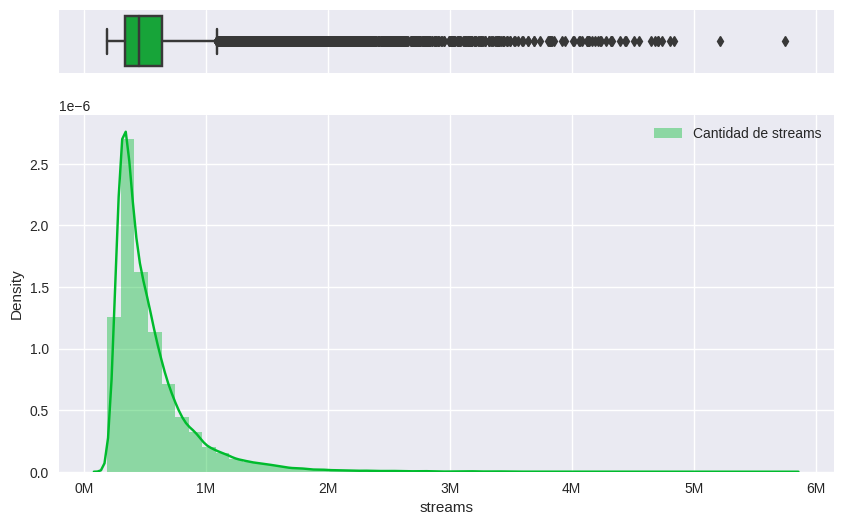

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, figsize=(10,6), gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(df['streams'], ax=ax_box, orient="h")
sns.distplot(df['streams'], ax=ax_hist, label='Cantidad de streams')
ax_hist.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x * 1e-6))) # Formateo el eje x a millones
ax_box.set(yticks=[])
ax_hist.legend()

Al analizar la distribución de los streams, se observa que la mayoría de las canciones tienen una cantidad de streams por debajo de los 2M. Esto se refleja en el histograma asimétrico a la derecha, donde se ve una concentración de canciones en el rango más bajo de streams.

Sin embargo, el boxplot revela una presencia significativa de valores atípicos por encima de los 2M streams. Estos puntos negros representan un número considerable de canciones con un alto número de streams, incluso superando los 5M.

Este contraste entre la mayoría de canciones con un bajo número de streams y la presencia de un grupo notable de canciones con un alto número de streams puede deberse a diferentes factores como éxitos internacionales, temas virales o lanzamientos de artistas populares.

Debido al gran tamaño del dataset, la acumulación de los puntos negros en el boxplot puede dificultar la distinción de valores que sean realmente atípicos, lo que puede resolverse con una estandarización de variables. De todas formas, a priori vemos dos datos significativamente atípicos.

In [ ]:
outliers = df[df['streams'] > 5000000]
columnas_interes = ['streams', 'day', 'month', 'year', 'track_name']
tabla = outliers[columnas_interes]
print(tabla.reset_index(drop=True))

   streams  day  month  year track_name
0  5749019   29      6  2018    Nonstop
1  5219711   29      6  2018   Survival


En un mayor detalle de los dos valores extremos, notamos que ambos son del mismo día, por lo que puede tratarse de un error o de un fenómeno ocurrido en aquel día que viralizó estás canciones, será necesario un análisis más profundo para determinarlo.

### Análisis de características musicales

¿Existe correlación lineal entre las características musicales que uno pensaría que podrían estar relacionadas?

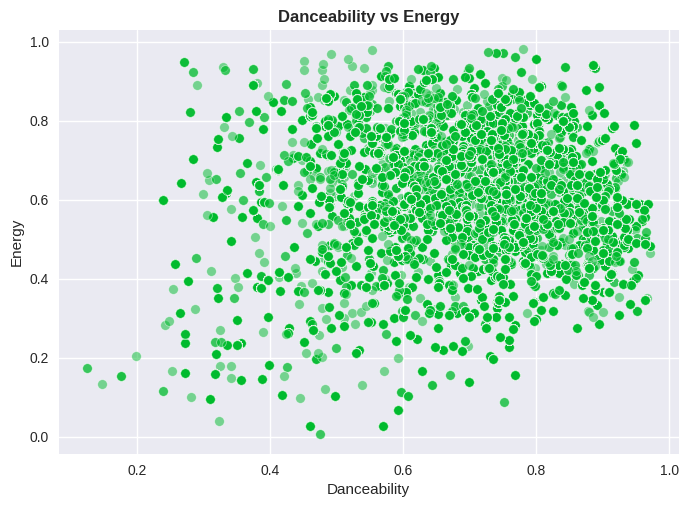

In [ ]:
sns.scatterplot(data=df, x="danceability", y="energy", alpha = 0.5)
plt.xlabel("Danceability")
plt.ylabel("Energy")
plt.title("Danceability vs Energy")
plt.show()

El gráfico muestra una concentración de valores en la parte superior con una tendencia hacia la derecha, esto sugiere que ambas características suelen estar acompañadas en la mayoría de las canciones. Sin embargo, existe bastante dispersión, lo que implica que hay una variabilidad en los niveles de energía y bailabilidad de las canciones posiblemente explicada por la diversidad de géneros que hay en el dataset.

In [ ]:
correlacion = df['danceability'].corr(df['energy'], method='pearson')
correlacion.round(2)

-0.06

---

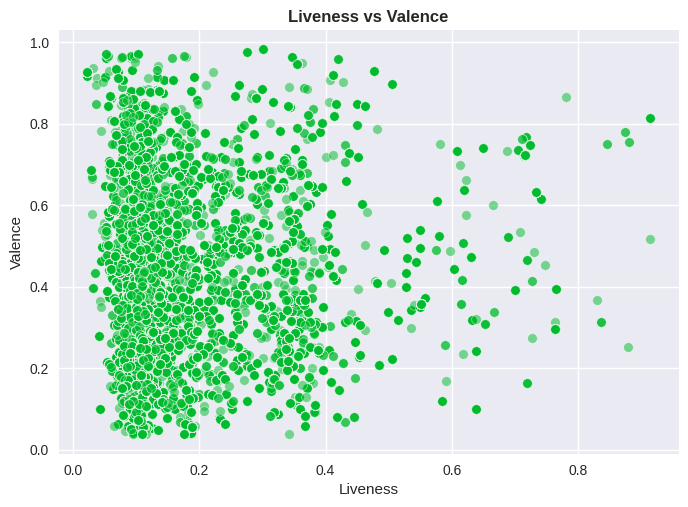

In [ ]:
sns.scatterplot(data=df, x="liveness", y="valence", alpha = 0.5)
plt.xlabel("Liveness")
plt.ylabel("Valence")
plt.title("Liveness vs Valence")
plt.show()

En este gráfico la mayoría de los valores se concentran en la parte izquierda, específicamente entre los valores 0.0 y 0.4 en el eje x, esto indica que la mayoría de las canciones no fueron grabadas en vivo. Por otro lado, los puntos están dispersos a lo largo de todo el eje y, lo que sugiere una variabilidad en el positivismo de las canciones. Sería útil analizar la relación entre el positivismo de las canciones y la cantidad de streams.

In [ ]:
correlacion = df['liveness'].corr(df['valence'], method='pearson')
correlacion.round(2)

-0.03

---

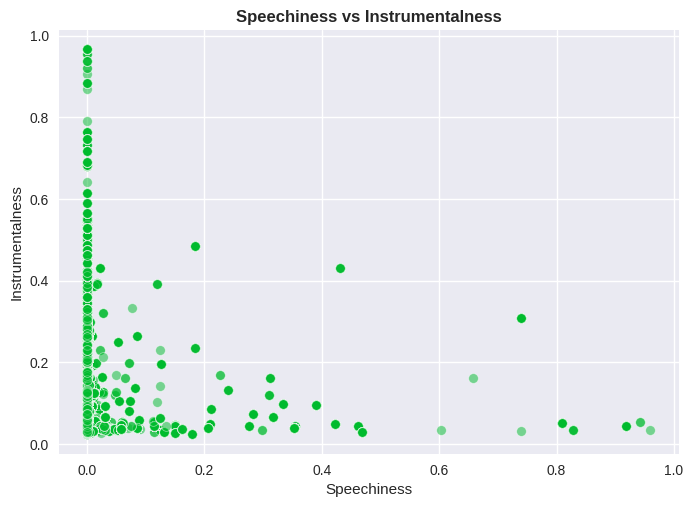

In [ ]:
sns.scatterplot(data=df, y="speechiness", x="instrumentalness", alpha = 0.5)
plt.xlabel("Speechiness")
plt.ylabel("Instrumentalness")
plt.title("Speechiness vs Instrumentalness")
plt.show()

Se observa que la mayoría de los valores se concentran en la parte inferior y hacia la izquierda, lo que tiene sentido dado que estamos comparando dos variables opuestas. La mayor concentración ocurre a lo largo de la línea vertical del eje x en 0.0, lo que indica una alta predominancia de canciones con baja presencia de palabras y gran presencia de instrumentos.

In [ ]:
correlacion = df['speechiness'].corr(df['instrumentalness'], method='pearson')
correlacion.round(2)

-0.06

---

En general, estos gráficos permiten entender mejor la distribución y las relaciones entre las variables, la diversidad de géneros musicales dentro del dataset puede dar lugar a la variabilidad observada en los gráficos.

Al calcular los coeficientes de correlación, vemos que la relación entre las variables es muy débil y no existe una tendencia clara de que una variable aumente o disminuya a medida que la otra cambia. De todas formas, es importante tener en cuenta que un coeficiente de correlación cercano a cero no implica que no haya ninguna relación entre las variables, simplemente significa que no hay una relación lineal fuerte y que otros tipos de relaciones no lineales podrían existir. Podría ser útil realizar análisis más profundos sobre las variables para hallar relaciones entre ellas, como por ejemplo un PCA.









### Análisis de series temporales

¿La cantidad de streams tiene algún patrón estacional?

In [ ]:
df['year'].unique()

array([2017, 2018])

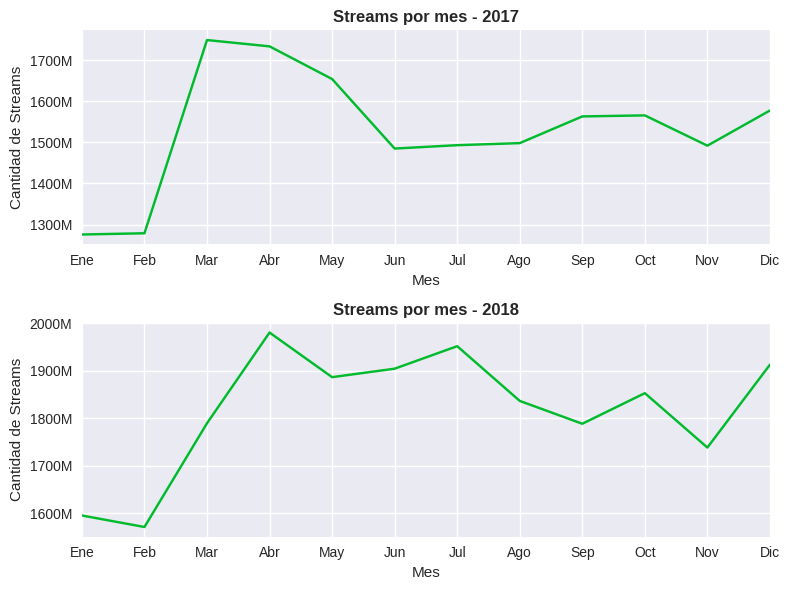

In [ ]:
streams_by_month = df.groupby(['year', 'month'])['streams'].sum().reset_index()
years = [2017, 2018]

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 6))

for i, year in enumerate(years):
    data = streams_by_month[streams_by_month['year'] == year]
    axes[i].plot(data['month'], data['streams'])
    axes[i].set_title(f'Streams por mes - {year}')
    axes[i].set_xlabel('Mes')
    axes[i].set_ylabel('Cantidad de Streams')
    axes[i].set_xlim(1, 12)
    axes[i].set_xticks(np.arange(1, 13, 1))
    axes[i].set_xticklabels(['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
    axes[i].yaxis.set_major_locator(ticker.MultipleLocator(100000000))
    axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}M'.format(x * 1e-6)))  # formato de millones para el eje y


plt.tight_layout()
plt.show()

En general, se observa que la cantidad de streams en el año 2018 fue mayor en comparación con el año 2017. Esta diferencia se destaca desde el inicio, ya que la escala del eje y para el año 2018 comienza en 1600M, casi alcanzando el valor máximo de streams del año 2017.

De todas formas, ambos años muestran un patrón similar en la evolución de la cantidad de streams durante los primeros meses del año. Los primeros dos meses tienen la menor cantidad de streams, lo que podría deberse a las tendencias de consumo durante las vacaciones o días festivos. Luego, se observa un aumento exponencial en ambos años, alcanzando su punto máximo en marzo para el año 2017 y en abril para el año 2018.

Después de alcanzar los picos, en el año 2017 se ve una caída progresiva que llega a su punto mínimo en junio de 2017 y luego se mantiene con cierta estabilidad hasta fin de año con un aumento más significativo en diciembre. En el caso del año 2018, el período de estabilidad se mantiene desde abril hasta julio, con una caída pronunciada en los meses de agosto y septiembre. Se recupera ligeramente en octubre, pero luego vuelve a caer en noviembre. Finalmente, hay una recuperación con un notorio aumento en diciembre. Estos resultados podrían estar influenciados por diversos factores, como el lanzamiento de nuevos álbumes, eventos de la industria musical, campañas de promoción, entre otros.

En conslusión, lo más útil para nuestro análisis sería enfocarnos en los primeros meses del año, en los que parece repetirse un patrón con picos bastante marcados. De todas formas, sería conveniente tener información de otros años para fundamentarlo.

In [ ]:
streams_by_month = df.groupby(['month'])['streams'].agg(['mean', 'median', 'min', 'max']).reset_index().round(0)
streams_by_month = streams_by_month.rename(columns={'mean': 'Media', 'median': 'Mediana', 'min': 'Mínimo', 'max': 'Máximo'})
print(streams_by_month.to_string(index=False))

 month    Media  Mediana  Mínimo  Máximo
     1 463123.0 385790.0  192102 4739798
     2 508961.0 412023.0  227968 3736723
     3 570617.0 452658.0  235236 3490888
     4 618852.0 449064.0  233192 4233070
     5 589999.0 474744.0  230696 3034705
     6 574374.0 456200.0  215509 5749019
     7 556256.0 443884.0  215232 4805299
     8 537789.0 444622.0  216650 4244308
     9 558522.0 467048.0  230959 4444027
    10 551288.0 459844.0  228896 2823276
    11 538342.0 448122.0  215302 4190968
    12 562862.0 485346.0  248302 2540164


Vemos que los meses de mayor actividad suelen ser enero, febrero, abril, junio, julio y diciembre, mientras que los meses con menor actividad son octubre y noviembre. También podemos ver que los valores de la mediana están generalmente cerca de los valores de la media, lo que sugiere que la distribución puede ser más o menos simétrica.

Los valores máximos pueden variar significativamente, lo que indica que hay meses en los que se registra un mayor pico de streams que puede estar explicado por factores como eventos comerciales o viralizaciones. Por otro lado, los valores mínimos parecen mantenerse más estables.

Los meses de enero y diciembre parecen tener los valores más altos tanto en términos de media como de mediana. Esto podría indicar que estos meses son más populares en términos de streaming de música, posiblemente debido a las festividades y celebraciones que ocurren durante esas épocas del año.

Es importante destacar que la tabla y el gráfico muestran diferentes aspectos de los datos. La tabla proporciona información sobre las tendencias y distribución de los streams para cada mes individualmente, mientras que el gráfico muestra la evolución de la suma total de streams en cada mes durante los años 2017 y 2018, lo que puede ser más útil para nuestro análisis.



### Análisis de correlaciones

¿Existe alguna correlación lineal entre las diferentes variables?

¿Alguna de las variables está fuertemente relacionada con la cantidad de streams?

In [ ]:
matriz = df.corr()
matriz

<ipython-input-12-7668110952fa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz = df.corr()


,position,streams,year,month,day,danceability,energy,key,loudness,mode,speechiness,acousticness,liveness,valence,tempo,duration_ms,time_signature
position,1.000000,-0.749991,-0.000058,0.000008,0.000031,-0.001242,0.030420,0.004171,-0.010915,0.026258,0.015468,0.029211,0.007544,-0.026918,0.007301,-0.016523,-0.018239
streams,-0.749991,1.000000,0.130042,0.026059,0.011842,0.012232,-0.020408,0.004671,0.006928,-0.007404,-0.049629,-0.035055,0.000007,0.005892,-0.015183,-0.000203,0.017040
year,-0.000058,0.130042,1.000000,-0.001416,0.002556,0.012187,0.046933,0.001632,0.019046,0.008558,-0.082030,0.043100,-0.013435,-0.101446,0.056466,-0.172957,0.006025
month,0.000008,0.026059,-0.001416,1.000000,0.013680,-0.004435,-0.096742,0.011881,-0.009209,-0.018931,-0.018766,0.052742,-0.008189,0.008850,-0.018051,-0.136931,-0.027217
day,0.000031,0.011842,0.002556,0.013680,1.000000,0.001307,0.001094,0.001163,-0.007079,0.002080,-0.000084,0.003635,0.002069,-0.000258,0.001148,-0.019636,-0.007270
danceability,-0.001242,0.012232,0.012187,-0.004435,0.001307,1.000000,-0.040382,-0.026822,-0.011181,-0.039808,-0.031668,-0.018493,0.084824,0.030931,-0.016783,-0.039990,0.043002
energy,0.030420,-0.020408,0.046933,-0.096742,0.001094,-0.040382,1.000000,-0.028611,0.059115,0.039675,-0.011753,-0.046283,-0.000340,0.088234,0.039745,0.117323,0.041271
key,0.004171,0.004671,0.001632,0.011881,0.001163,-0.026822,-0.028611,1.000000,0.001036,-0.165170,-0.055591,0.000761,-0.148075,0.034678,-0.022652,-0.000622,-0.013063
loudness,-0.010915,0.006928,0.019046,-0.009209,-0.007079,-0.011181,0.059115,0.001036,1.000000,0.019450,0.008027,-0.005422,0.007107,0.051369,0.006522,0.018765,0.011773
mode,0.026258,-0.007404,0.008558,-0.018931,0.002080,-0.039808,0.039675,-0.165170,0.019450,1.000000,0.007513,0.061248,0.074377,-0.041457,-0.013100,0.024059,-0.038428


<Axes: >

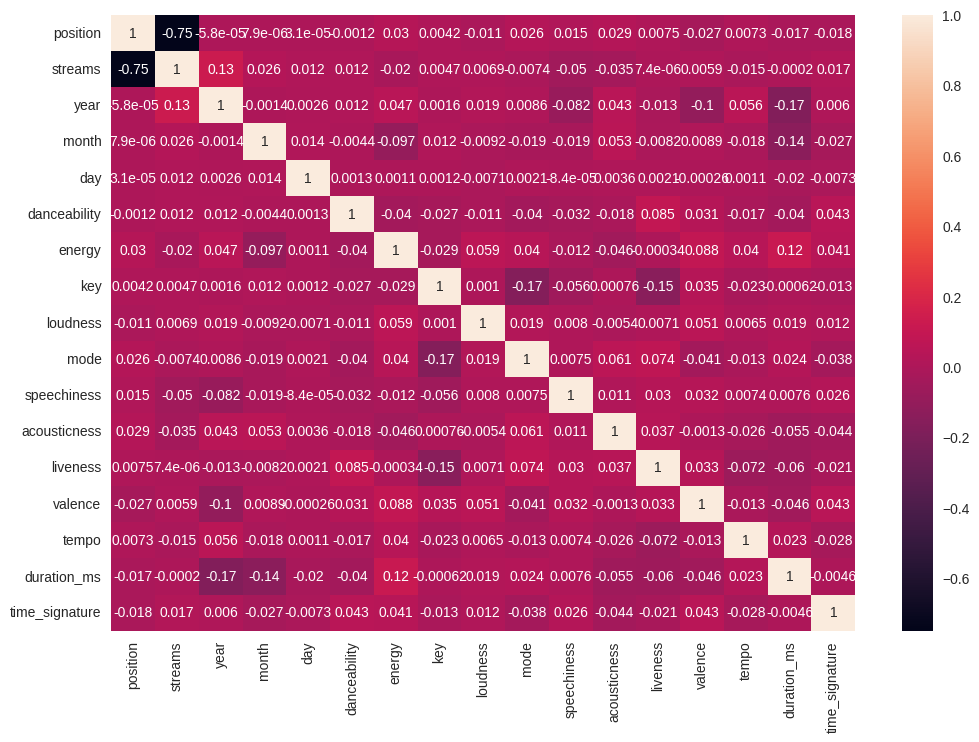

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(matriz, annot=True)

En la matriz de correlaciones de nuestro dataset podemos ver que no existen correlaciones lineales fuertes entre las variables, ni entre si mismas ni comparadas con la cantidad de streams, salvo por la posición del ranking (lo que es bastante obvio porque la posición en el ranking depende de la cantidad de streams). Con esto podemos rechazar nuestra hipotesis y empezar a buscar asociaciones de otros tipos entre las variables.